<h4>ChatGPT Internal Product Consistency Analysis</h4>

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df
from metrics import semantic_overlap
from plots import boxplot, heatmaps
from utility import top_n_semantic_products

<h4>Dataset: ChatGPT</h4>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,sources_all,domains_cited,domains_additional,domains_all,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, forbes.com], [tomsguide.com],...","[[reddit.com, tomsguide.com, techrepublic.com,...","[[tomsguide.com, forbes.com, reddit.com, techr...","[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, phonearena.com, wired.com], [...","[[reddit.com, theverge.com, techadvisor.com, w...","[[tomsguide.com, phonearena.com, wired.com, re...","[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,[[https://www.techradar.com/news/best-cameraph...,"[[tomsguide.com, techradar.com], [abdgadgets.c...","[[reddit.com, tomsguide.com, stuff.tv, techadv...","[[tomsguide.com, techradar.com, reddit.com, st...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,[[https://www.androidcentral.com/phones/oneplu...,"[[androidcentral.com, tomsguide.com, phonearen...","[[tomsguide.com, wired.com, co.uk, 9to5google....","[[androidcentral.com, tomsguide.com, phonearen...","[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,[[https://www.pcworld.com/article/436674/best-...,"[[windowscentral.com, rtings.com, pcworld.com,...","[[reddit.com, bestbuy.com, windowscentral.com,...","[[windowscentral.com, rtings.com, pcworld.com,...","[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, wired.com], [tomshardware....","[[reddit.com, tomshardware.com, pcworld.com, y...","[[tomshardware.com, wired.com, reddit.com, pcw...","[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, techradar.com], [tomshardw...","[[reddit.com, tomsguide.com, tomshardware.com,...","[[tomshardware.com, techradar.com, reddit.com,...","[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.ultrabookreview.com/2071-best-

<h4>Mean Internal Product Overlap (MIPO) - Definition & Implementation</h4> 
For each query $q$, ChatGPT produces three product sets 
$P_q^{\mathrm{G}} = \{p^{\mathrm{G}}_{q1}, p^{\mathrm{G}}_{q2}, p^{\mathrm{G}}_{q3}\}$.  
To measure consistency within the system, we compute the semantic overlap between all unordered pairs of product sets.

Let $\mathcal{C} = \{(i,j) \mid 1 \le i < j \le |P_q^{\mathrm{G}}|\}\quad \Rightarrow \quad |\mathcal{C}| = {{|P_q^{\mathrm{G}}|}\choose{2}}$

Then, the mean internal product overlap is defined as:
$$\mathrm{MIPO}(q) =
\frac{1}{|\mathcal{C}|}
\sum_{(i,j)\in \mathcal{C}}
\mathrm{overlap}_{semantic}(p^{\mathrm{G}}_{qi}, p^{\mathrm{G}}_{qj})$$


In [3]:
def calc_mipo(chatgpt_df):
    from itertools import combinations
    
    mipo_results = []

    for _, row in chatgpt_df.iterrows():
        row_list = row["recommended_products"]
        # print(row["query"])
        
        pairwise_scores = []

        for c in combinations(row_list, 2):
             # c = (i,j)
            score = semantic_overlap(c[0], c[1]) 
            pairwise_scores.append(score)

        semantic_mean = np.mean(pairwise_scores)
        semantic_var = np.var(pairwise_scores, ddof = 0)
        semantic_std = np.sqrt(semantic_var)

        mipo_results.append({
            "query": row["query"],
            "product": row["product"],
            "market_type": row["market_type"],
            "query_level": row["query_level"],
            "mipo_mean": semantic_mean,
            "mipo_var": semantic_var,
            "mipo_std": semantic_std
        })

    return pd.DataFrame(mipo_results)

In [4]:
mipo_df = calc_mipo(chatgpt_df)
mipo_df.to_csv("mipo_df.csv")
mipo_df

,query,product,market_type,query_level,mipo_mean,mipo_var,mipo_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.740741,0.035665,0.188853
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.791667,0.003472,0.058926
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.875000,0.000000,0.000000
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.583333,0.045139,0.212459
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.359259,0.003813,0.061753
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.125000,0.010417,0.102062
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.333333,0.000000,0.000000
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.291667,0.024306,0.155902
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.791667,0.003472,0.058926
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.708333,0.003472,0.058926


<h4>Mean Internal Product Overlap - Analysis</h4>

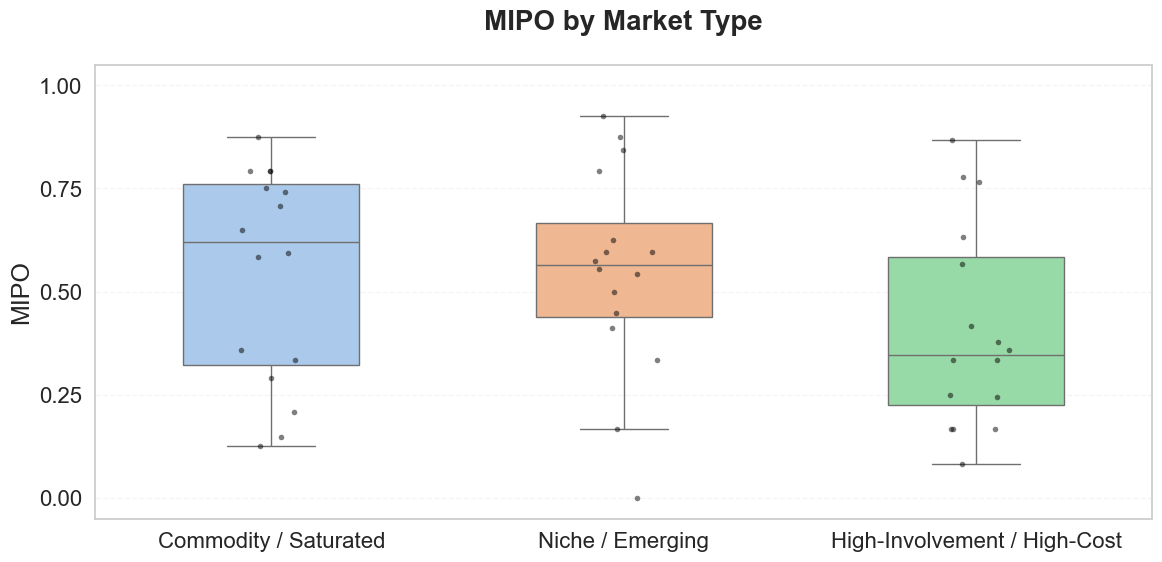

In [5]:
mipo_cs = mipo_df[mipo_df["market_type"] == "Commodity / Saturated"]
mipo_ne = mipo_df[mipo_df["market_type"] == "Niche / Emerging"]
mipo_hh = mipo_df[mipo_df["market_type"] == "High-Involvement / High-Cost"]

plot_df = pd.DataFrame({
    "MIPO": pd.concat([
        mipo_cs["mipo_mean"],
        mipo_ne["mipo_mean"],
        mipo_hh["mipo_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(mipo_cs)
        + ["Niche / Emerging"] * len(mipo_ne)
        + ["High-Involvement / High-Cost"] * len(mipo_hh)
    )
})

boxplot(
    df = plot_df,
    x_col = "Market Type",
    y_col = "MIPO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "MIPO by Market Type",
    xlabel = "",
    ylabel = "MIPO"
)

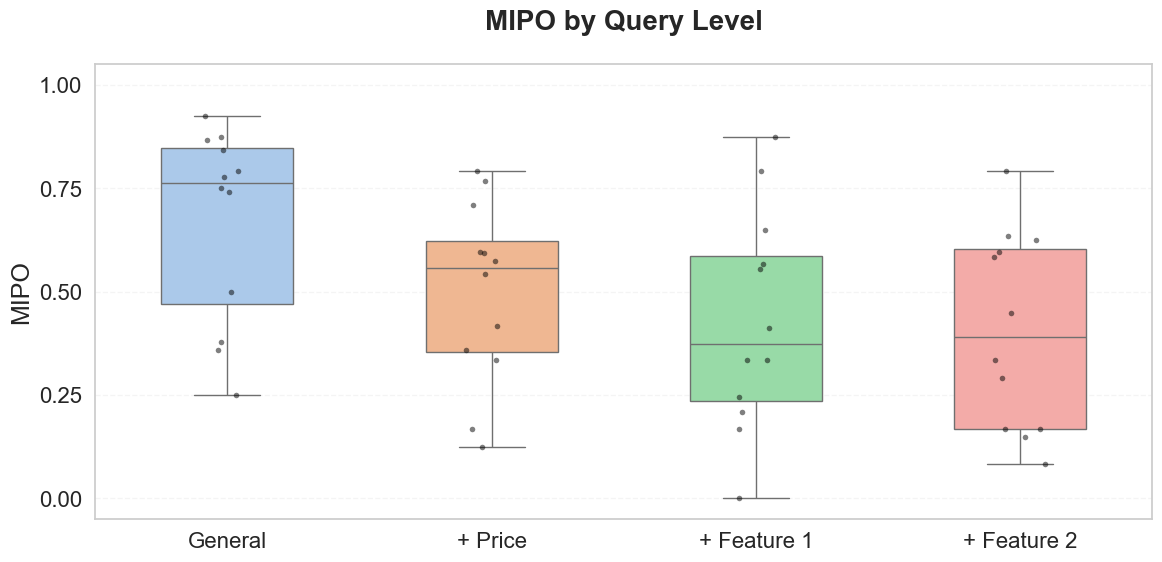

In [6]:
mipo_g = mipo_df[mipo_df["query_level"] == "General"]
mipo_gp = mipo_df[mipo_df["query_level"] == "General & Price"]
mipo_gpf = mipo_df[mipo_df["query_level"] == "General & Price & Feature"]
mipo_gpff = mipo_df[mipo_df["query_level"] == "General & Price & Feature & Feature"]

plot_df = pd.DataFrame({
    "MIPO": pd.concat([
        mipo_g["mipo_mean"],
        mipo_gp["mipo_mean"],
        mipo_gpf["mipo_mean"],
        mipo_gpff["mipo_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["General"] * len(mipo_g)
        + ["+ Price"] * len(mipo_gp)
        + ["+ Feature 1"] * len(mipo_gpf)
        + ["+ Feature 2"] * len(mipo_gpff)
    )
})

boxplot(
    df = plot_df,
    x_col = "Query Level",
    y_col = "MIPO",
    order = ["General", "+ Price", "+ Feature 1", "+ Feature 2"],
    title = "MIPO by Query Level",
    xlabel = "",
    ylabel = "MIPO"
)

<br/>

<h4>Cross-Query Mean Internal Product Overlap (Allpairs) – Definition & Implementation</h4>
For each query $q$, ChatGPT returns three product lists 
$P_q^{\mathrm{G}} = \{p^{\mathrm{G}}_{q1}, p^{\mathrm{G}}_{q2}, p^{\mathrm{G}}_{q3}\}$. 
To compare internal consistency across different queries, we compute the mean semantic overlap between all product lists from query $i$ and query $j$. Thus, the cross-query mean internal product overlap is defined as:
$$\mathrm{CQMIPO}[i,j] =
\frac{1}{|P_i^{\mathrm{G}}| \cdot |P_j^{\mathrm{G}}|}
\sum_{k=1}^{|P_i^{\mathrm{G}}|}
\sum_{l=1}^{|P_j^{\mathrm{G}}|}
\mathrm{overlap}_{semantic}(p^{\mathrm{G}}_{ik}, p^{\mathrm{G}}_{jl})$$


In [7]:
def calc_cqmipo_allpairs(chatgpt_df, filter_col = None):
    
    n = len(chatgpt_df)
    cqmipo_matrix = np.full((n, n), 0, dtype = float)
    product_lists = chatgpt_df["recommended_products"].tolist()
    
    # filter
    filter_values = chatgpt_df[filter_col].tolist() if filter_col else [None] * n
    
    for i in tqdm(range(n), desc = f"Computing CQMIPO (filtered by {filter_col})", unit = "query"):
        for j in range(i, n):
            if filter_col and filter_values[i] != filter_values[j]:
                continue
            
            pairwise_overlaps = [
                semantic_overlap(a, b)
                for a in product_lists[i]
                for b in product_lists[j]
            ]
            cqmipo = np.mean(pairwise_overlaps) if pairwise_overlaps else np.nan
            cqmipo_matrix[i, j] = cqmipo
            cqmipo_matrix[j, i] = cqmipo
    
    return pd.DataFrame(cqmipo_matrix, index = chatgpt_df["query"], columns = chatgpt_df["query"])

Computing CQMIPO (filtered by product):   0%|          | 0/48 [00:00<?, ?query/s]

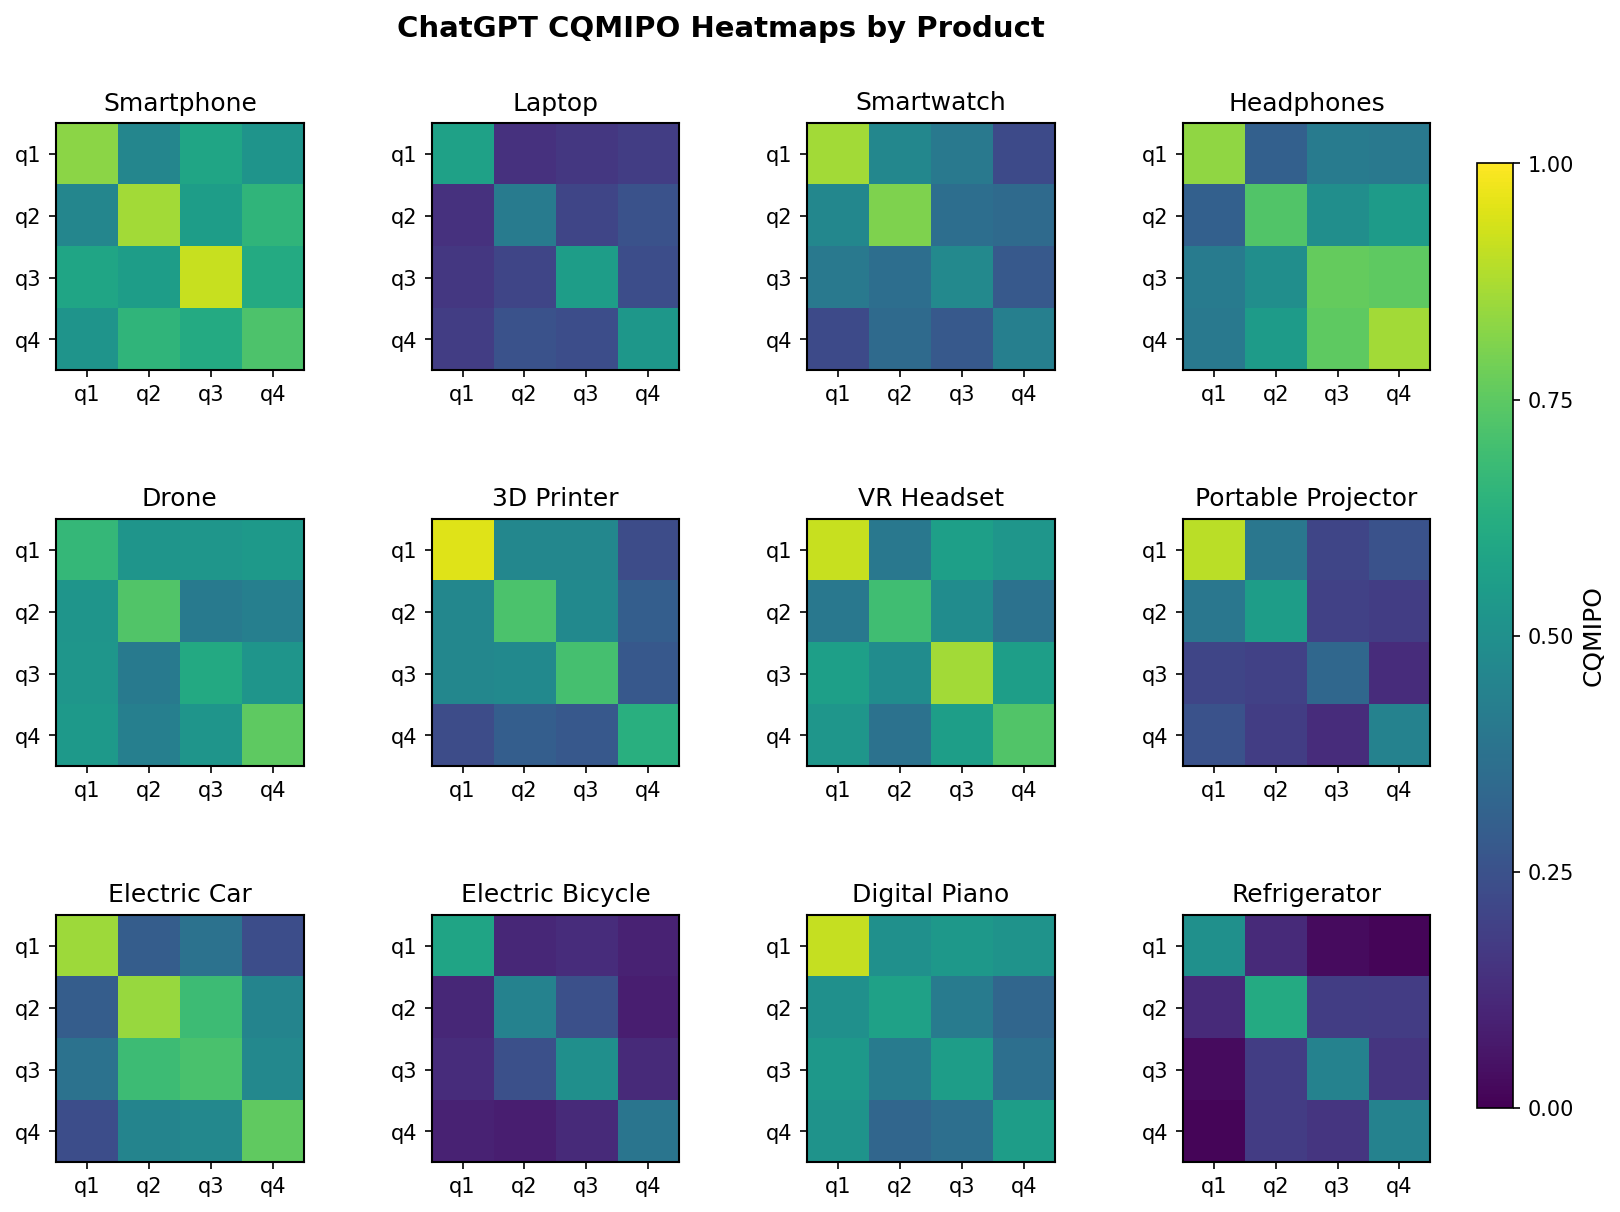

In [8]:
cqmipo_matrix_p_a = calc_cqmipo_allpairs(chatgpt_df, filter_col = "product")
heatmaps(cqmipo_matrix_p_a, chatgpt_df, filter_col = "product", title = "ChatGPT CQMIPO Heatmaps by Product", colorbar_label = "CQMIPO")

Computing CQMIPO (filtered by market_type):   0%|          | 0/48 [00:00<?, ?query/s]

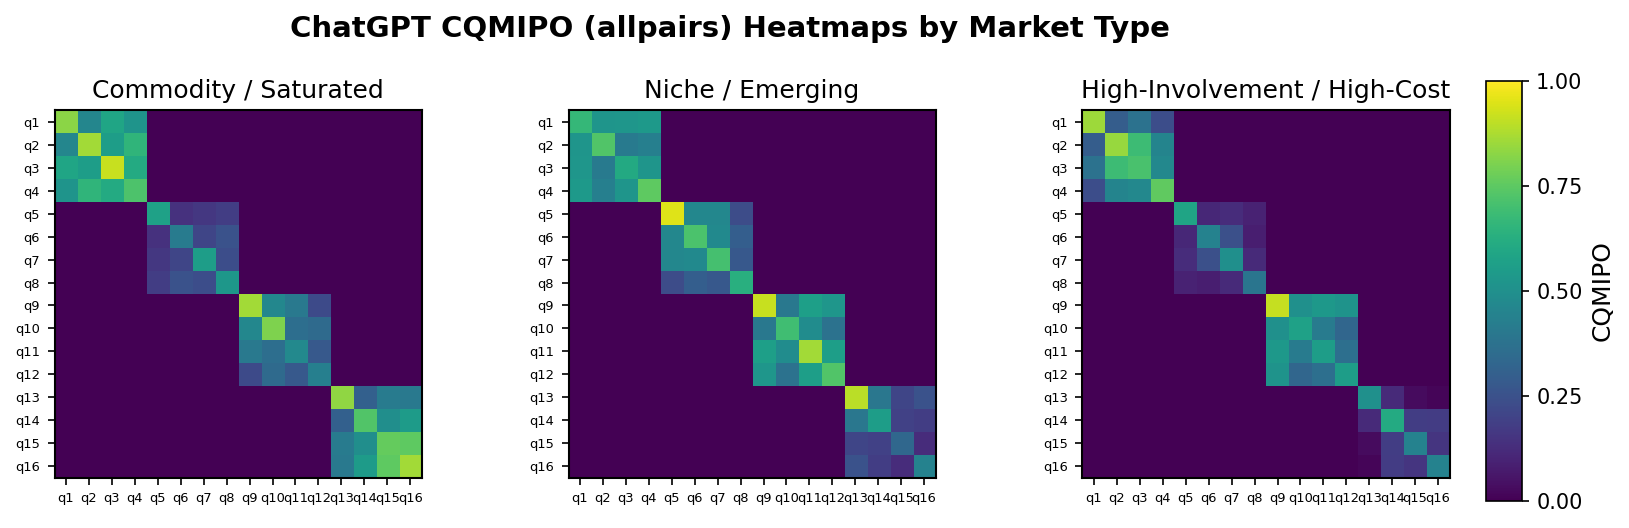

In [9]:
cqmipo_mat_mt_a = calc_cqmipo_allpairs(chatgpt_df, filter_col = "market_type")
heatmaps(cqmipo_mat_mt_a, chatgpt_df, filter_col = "market_type", title = "ChatGPT CQMIPO (allpairs) Heatmaps by Market Type", colorbar_label = "CQMIPO")

<br />

<h2><center>---------- Additional Content ----------</center></h2>

<h4>Cross-Query Overall Product Overlap — Definition & Implementation</h4>
<p>CQOPO measures how consistently ChatGPT recommends the same core products across different queries. It compares the semantically aggregated “top” product lists that ChatGPT produces for two queries.</p>
<ul>
<li>ChatGPT lists for queries: $G_{q_i} = [g_{i1}, \ldots, g_{iM}]$ and $G_{q_j} = [g_{j1}, \ldots, g_{jN}]$</li>
<li>Aggregated via <code>top_n_semantic_products</code>: $\tilde{G}_{q_i} = \text{TopN}(G_{q_i}), \; \tilde{G}_{q_j} = \text{TopN}(G_{q_j})$</li>
</ul>
<p>Cross-query overlap is then defined as:</p>
<p>$$\mathrm{CQOPO}(q_i, q_j) = O_{\text{semantic}}(\tilde{G}_{q_i}, \tilde{G}_{q_j})$$</p>
<p>Here, $O_{\text{semantic}}(\cdot,\cdot)$ denotes the semantic overlap between the two aggregated top lists, reflecting how similar the key recommended products are across different user intents or phrasings.</p>

In [10]:
def calc_cqopo(chatgpt_df, filter_col = "product", top_n = 10):
    n = len(chatgpt_df)
    cqopo_matrix = np.full((n, n), 0, dtype = float)
    product_lists = chatgpt_df["recommended_products"].tolist()
    
    # filter
    filter_values = chatgpt_df[filter_col].tolist() if filter_col else [None] * n
    
    for i in tqdm(range(n), desc = f"Computing CQMIPO (filtered by {filter_col})", unit = "query"):
        for j in range(i, n):
            if filter_col and filter_values[i] != filter_values[j]:
                continue

            list_i = top_n_semantic_products(product_lists[i], top_n = top_n)
            list_j = top_n_semantic_products(product_lists[j], top_n = top_n)
            
            cqmipo = semantic_overlap(list_i, list_j)
            cqopo_matrix[i, j] = cqmipo
            cqopo_matrix[j, i] = cqmipo
    
    return pd.DataFrame(cqopo_matrix, index = chatgpt_df["query"], columns = chatgpt_df["query"])

Computing CQMIPO (filtered by product):   0%|          | 0/48 [00:00<?, ?query/s]

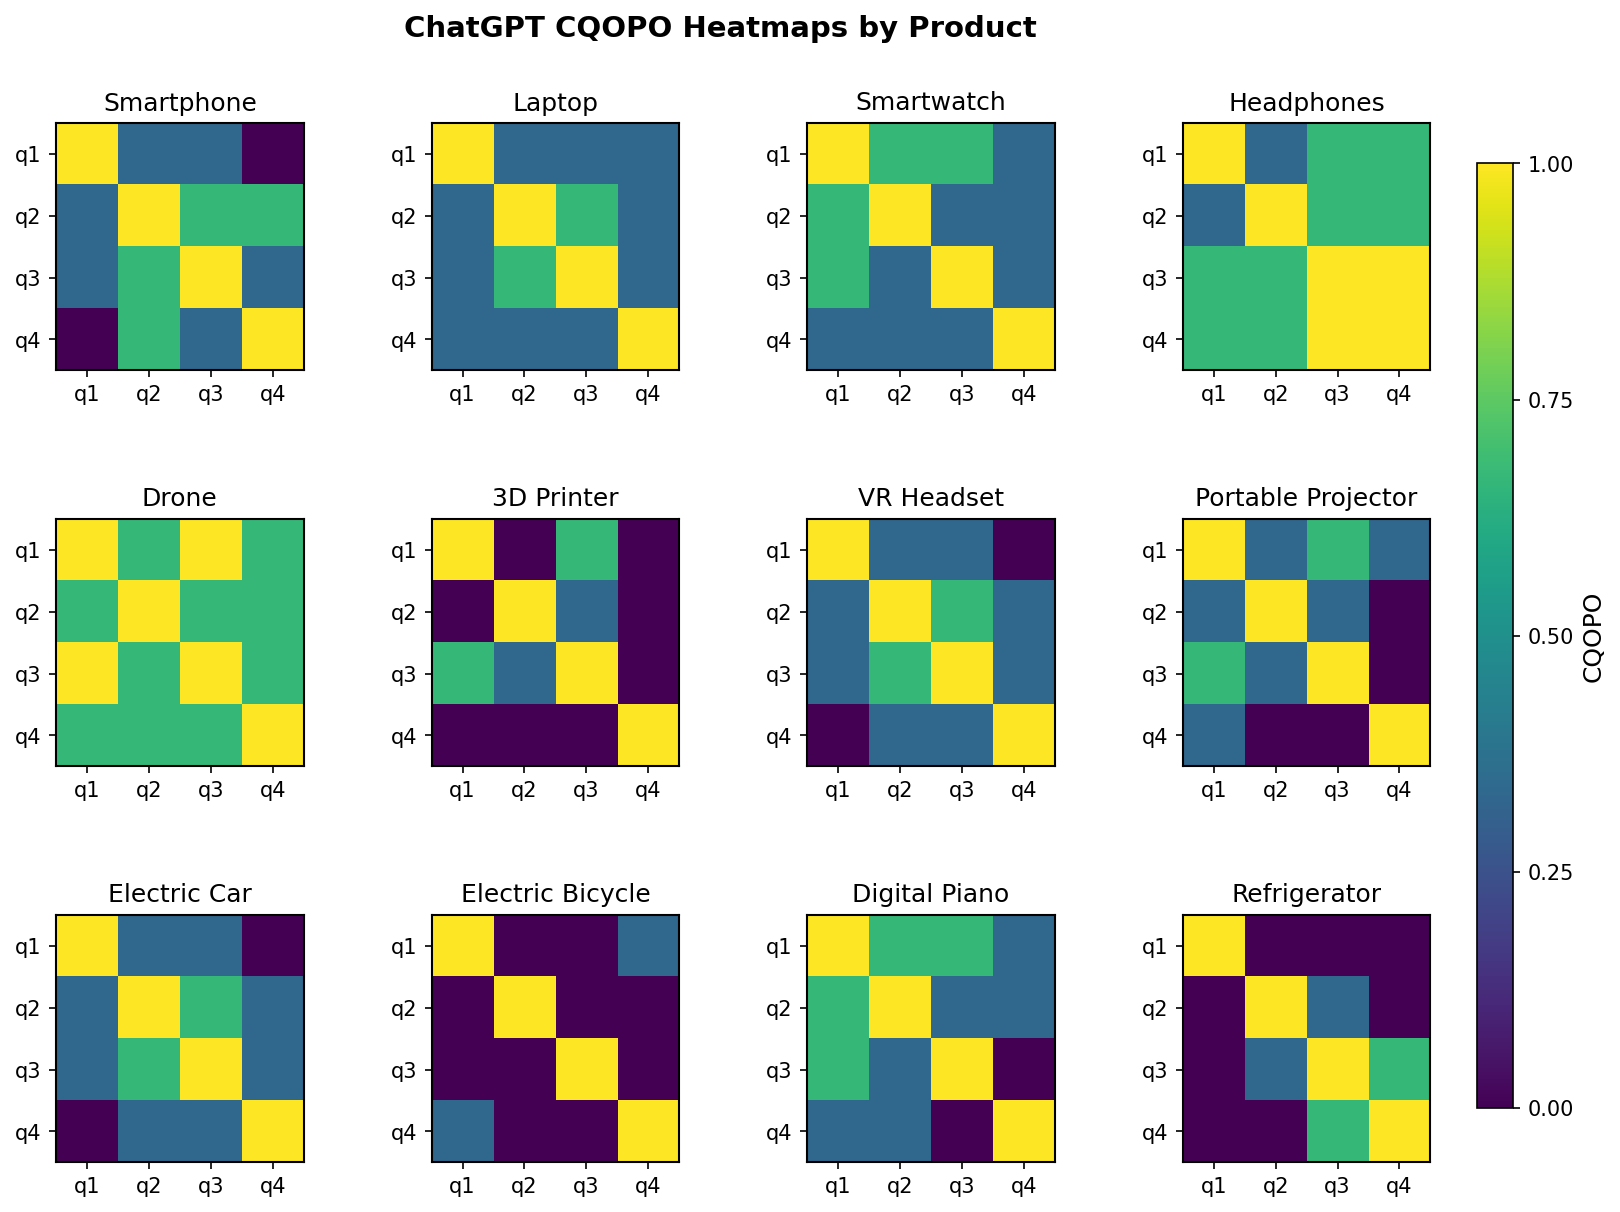

In [11]:
cqopo_mat_p = calc_cqopo(chatgpt_df, filter_col = "product", top_n = 3)
heatmaps(cqopo_mat_p, chatgpt_df, filter_col = "product", title = "ChatGPT CQOPO Heatmaps by Product", colorbar_label = "CQOPO")

Computing CQMIPO (filtered by market_type):   0%|          | 0/48 [00:00<?, ?query/s]

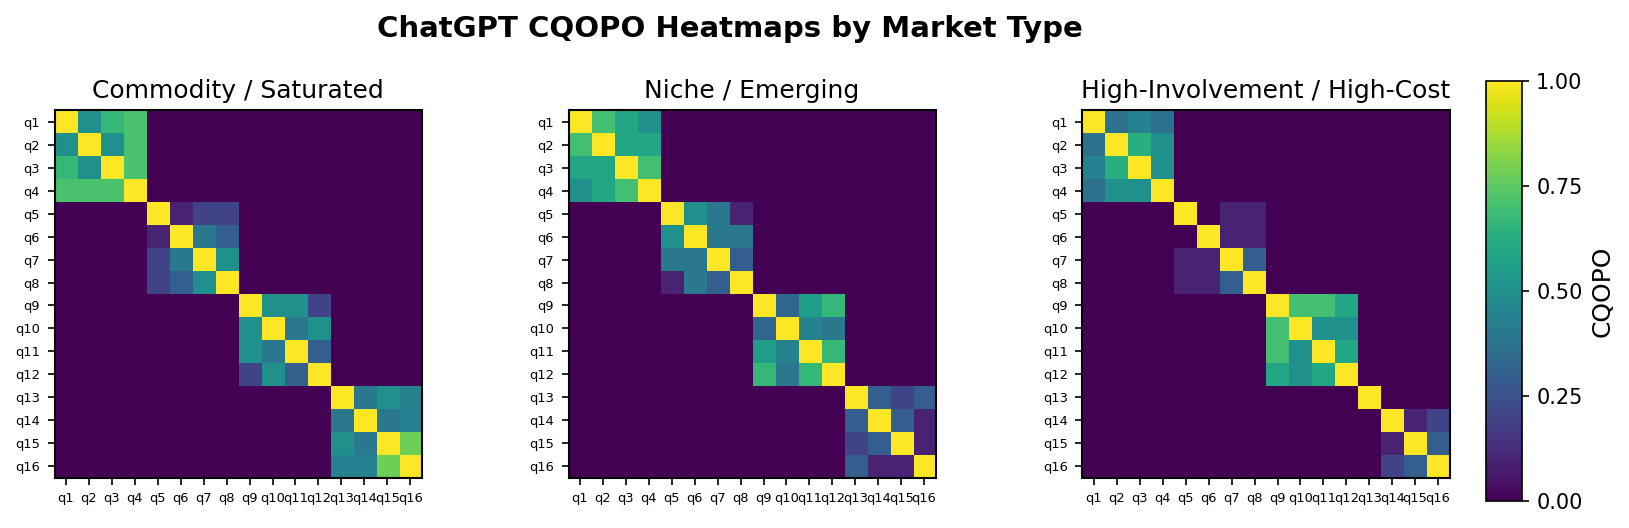

In [12]:
cqmipo_mat_mt = calc_cqopo(chatgpt_df, filter_col = "market_type")
heatmaps(cqmipo_mat_mt, chatgpt_df, filter_col = "market_type", title = "ChatGPT CQOPO Heatmaps by Market Type", colorbar_label = "CQOPO")